### WordNet
Wordnet is a database of nouns, verbs, adjectives, and adverbs. These words contain short definitions called glosses. Words are partitioned into synonym sets called synsets.

In [136]:
import math
import nltk
from nltk.corpus import wordnet as wn
from nltk.wsd import lesk
from nltk.corpus import sentiwordnet as swn
from nltk.book import text2, text4
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

### Finding Definition, Examples, and Lemmas of a Noun

Chosen synset is 'city.n.01'.



In [79]:
wn.synsets("city")

[Synset('city.n.01'), Synset('city.n.02'), Synset('city.n.03')]

In [78]:
wn.synset('city.n.01').definition()

'a large and densely populated urban area; may include several independent administrative districts'

In [21]:
wn.synset('city.n.01').examples()

['Ancient Troy was a great city']

In [24]:
 wn.synset('city.n.01').lemmas()

[Lemma('city.n.01.city'),
 Lemma('city.n.01.metropolis'),
 Lemma('city.n.01.urban_center')]

### WordNet Noun Hierarchy
This code section traverses up the WordNet hierarchy and prints synsets. WordNet organizes its nouns via hierarchical relations. At the top, synsets retain only abstract and general values. For instance, synsets such as "location" provide a vague but encompassing definition of a city. As you descend the hierarchy, synsets incorporate dinstictive and specific features. In this case, the synset, "municipality", provides a more concrete definition of a city. 


In [63]:
city = wn.synset('city.n.01')
hyp = city.hypernyms()[0]
top = wn.synset('entity.n.01')
while hyp:
  print(hyp)
  if hyp == top:
    break
  if hyp.hypernyms():
    hyp = hyp.hypernyms()[0]

Synset('municipality.n.01')
Synset('administrative_district.n.01')
Synset('district.n.01')
Synset('region.n.03')
Synset('location.n.01')
Synset('object.n.01')
Synset('physical_entity.n.01')
Synset('entity.n.01')


### Extracting Hypernyms, Hyponyms, Meronyms, Holonyms, and Antonyms from a Noun


In [29]:
wn.synset('city.n.01').hypernyms()

[Synset('municipality.n.01')]

In [30]:
wn.synset('city.n.01').hyponyms()

[Synset('national_capital.n.01'),
 Synset('provincial_capital.n.01'),
 Synset('state_capital.n.01')]

In [33]:
wn.synset('city.n.01').part_meronyms()

[Synset('city_center.n.01'),
 Synset('civic_center.n.02'),
 Synset('concrete_jungle.n.01'),
 Synset('financial_center.n.01'),
 Synset('inner_city.n.01'),
 Synset('medical_center.n.01')]

In [34]:
wn.synset('city.n.01').part_holonyms()

[]

In [51]:
for lemma in wn.synset('city.n.01').lemmas():
  print("Lemma:", lemma)
  print("Antonym(s):", lemma.antonyms())

Lemma: Lemma('city.n.01.city')
Antonym(s): []
Lemma: Lemma('city.n.01.metropolis')
Antonym(s): []
Lemma: Lemma('city.n.01.urban_center')
Antonym(s): []


### Finding Definition, Examples, and Lemmas of a Verb

Chosen synset is 'solve.v.01'.

In [82]:
wn.synsets("solve")

[Synset('solve.v.01'), Synset('resolve.v.06'), Synset('clear.v.19')]

In [83]:
wn.synset('solve.v.01').definition()

'find the solution to (a problem or question) or understand the meaning of'

In [58]:
wn.synset('solve.v.01').examples()

['did you solve the problem?',
 'Work out your problems with the boss',
 "this unpleasant situation isn't going to work itself out",
 'did you get it?',
 'Did you get my meaning?',
 'He could not work the math problem']

In [61]:
wn.synset('solve.v.01').lemmas()

[Lemma('solve.v.01.solve'),
 Lemma('solve.v.01.work_out'),
 Lemma('solve.v.01.figure_out'),
 Lemma('solve.v.01.puzzle_out'),
 Lemma('solve.v.01.lick'),
 Lemma('solve.v.01.work')]

### WordNet Verb Hierarchy
WordNet does not provide an abstract top level synset for verbs. The original verb synset yielded only one hypernym synset - "understand.v.01". That particular synset yielded no hypernyms.   

In [71]:
solve = wn.synset('solve.v.01')
solve.hypernyms()

[Synset('understand.v.01')]

In [72]:
solve.hypernyms()[0].hypernyms()

[]

### Morphy
Morphy returns the root forms of words. It can work with different parts of speech.

In [89]:
 wn.morphy('solved', wn.VERB)

'solve'

In [90]:
 wn.morphy('cities', wn.NOUN)

'city'

### Word Similarity
The Wu-Palmer similarity metric yielded a low score for the words — "tree" and "forest". This suggests the lack of shared common ancestor words. 

Lesk algorithm can perform word sense disambiguation. Specifically, it looked at context words and inferred the original synset of the word — "forest".  

In [103]:
tree = wn.synset("tree.n.01")
forest = wn.synset("forest.n.01")

In [104]:
print(wn.wup_similarity(tree, forest))

0.125


In [107]:
sentence = nltk.word_tokenize("I visited the trees in the forest.")
print(lesk(sentence, 'forest', 'n'))

Synset('forest.n.01')


### SentiWordNet
SentiWordNet is a resource built on top of WordNet. For each synset, it can assign three sentiment scores: positivity, negativity, and objectivity. Regarding a possible use case, SentiWordNet can perform sentiment analysis on documents. 

### Observations and Thoughts
Not surprisingly, the word, "happy", received a high positive score. I believe this word had a low objective score due to its subjectivity.

With the exception of the adjective, the sentence contained many neutral words. As a result, nearly all of these tokens had a high objective score. 

In the broader context, these scores can assist NLP applications. Their utility enables the usage of sentiment analysis. The machine can conceptualize subjective information and assign an associated polarity score. 

In [117]:
happy_synsets = wn.synsets("happy")
senti_list = []
for synset in happy_synsets:
  senti_synset = swn.senti_synset(synset.name())
  print("Synset:", senti_synset.synset.name())
  print("Positive Score:", senti_synset.pos_score())
  print("Negative Score:", senti_synset.neg_score())
  print("Objective Score:", senti_synset.obj_score())
  print("\n")



Word: happy.a.01
Positive Score: 0.875
Negative Score: 0.0
Objective Score: 0.125


Word: felicitous.s.02
Positive Score: 0.75
Negative Score: 0.0
Objective Score: 0.25


Word: glad.s.02
Positive Score: 0.5
Negative Score: 0.0
Objective Score: 0.5


Word: happy.s.04
Positive Score: 0.125
Negative Score: 0.0
Objective Score: 0.875




In [120]:
sentence = "The story had a happy ending"
tokens = sentence.split()
for token in tokens:
  syn_list = list(swn.senti_synsets(token))
  if syn_list:
    print("Token:", token)
    print("Positive Score:", syn_list[0].pos_score())
    print("Negative Score:", syn_list[0].neg_score())
    print("Objective Score:", syn_list[0].obj_score())
    print("\n")    


Token: story
Positive Score: 0.0
Negative Score: 0.0
Objective Score: 1.0


Token: had
Positive Score: 0.25
Negative Score: 0.0
Objective Score: 0.75


Token: a
Positive Score: 0.0
Negative Score: 0.0
Objective Score: 1.0


Token: happy
Positive Score: 0.875
Negative Score: 0.0
Objective Score: 0.125


Token: ending
Positive Score: 0.0
Negative Score: 0.0
Objective Score: 1.0




### Collocations
Collocations refer to popular combinations of two or more words. These words occur together with a frequency greater than chance. One example is the phrase — "heavy rain". 

In [125]:
text4.collocations()

United States; fellow citizens; years ago; four years; Federal
Government; General Government; American people; Vice President; God
bless; Chief Justice; one another; fellow Americans; Old World;
Almighty God; Fellow citizens; Chief Magistrate; every citizen; Indian
tribes; public debt; foreign nations


### Mutual Information
This formula finds collocations in text.

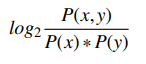

In [131]:
text2.collocations()

Colonel Brandon; Sir John; Lady Middleton; Miss Dashwood; every thing;
thousand pounds; dare say; Miss Steeles; said Elinor; Miss Steele;
every body; John Dashwood; great deal; Harley Street; Berkeley Street;
Miss Dashwoods; young man; Combe Magna; every day; next morning


In [135]:
text = ' '.join(text2.tokens)
text[:500]

'[ Sense and Sensibility by Jane Austen 1811 ] CHAPTER 1 The family of Dashwood had long been settled in Sussex . Their estate was large , and their residence was at Norland Park , in the centre of their property , where , for many generations , they had lived in so respectable a manner as to engage the general good opinion of their surrounding acquaintance . The late owner of this estate was a single man , who lived to a very advanced age , and who for many years of his life , had a constant com'

### Commentary and Interpretation
PMI can range from negative to positive values. Because the pmi is positive, this suggests that the words—"every" and "day"— occur together at a frequency greater than chance. This indicates the presence of a collocation. 

In [137]:
text_size = len(set(text2))
every_day = text.count('every day')/text_size
print("p(every day) = ", every_day )
every = text.count('every')/text_size
print("p(every) = ", every)
day = text.count('day')/text_size
print('p(day) = ', day)
pmi = math.log2(every_day / (every * day))
print('pmi = ', pmi)

p(every day) =  0.004244109468754574
p(every) =  0.05619786331040538
p(day) =  0.03424557295477828
pmi =  1.14095718629765
